# **Start H2O**
Import the `h2o Python module` and H2OAutoML class and initialize a local H2O cluster.

In [3]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
#!nvidia-smi

In [2]:
!pip install h2o

     |████████████████████████████████| 176.0 MB 6.4 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=108578137a212f1d77d12d9af8ac5e812ee25c89cf7831d42b713473a517e631
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


In [4]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptg4n27dx
  JVM stdout: /tmp/tmptg4n27dx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmptg4n27dx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_8myscx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Load Data
For the AutoML regression demo, we use the **Combined Cycle Power Plant** dataset. The goal here is to predict the energy output (in megawatts), given the temperature, ambient pressure, relative humidity and exhaust vacuum values. In this demo, you will use H2O's AutoML to outperform the state of the art results on this task.

In [5]:
import os

data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/powerplant_output.csv"


# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
df.describe()

Rows:9568
Cols:5




,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
type,real,real,real,real,real
mins,1.81,25.36,992.89,25.56,420.26
mean,19.651231187290957,54.3058037207358,1013.2590781772578,73.30897784280936,454.36500940635455
maxs,37.11,81.56,1033.3,100.16,495.76
sigma,7.452473229611082,12.707892998326807,5.93878370581162,14.600268756728957,17.066994999803423
zeros,0,0,0,0,0
missing,0,0,0,0,0
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56


**Next**, let's identify the response column and save the column name as y. In this dataset, we will use all columns except the response as predictors, so we can skip setting the x argument explicitly.

In [7]:
y = "HourlyEnergyOutputMW"

Lastly, let's split the data into two frames, a train (80%) and a test frame (20%). The test frame will be used to score the leaderboard and to demonstrate how to generate predictions using an AutoML leader model.

In [8]:
splits = df.split_frame(ratios = [0.8], seed = 123)
train = splits[0]
test = splits[1]

# Run AutoML
Run AutoML, stopping after **60 seconds**. The max_runtime_secs argument provides a way to `limit the AutoML run` by time. When using a time-limited stopping criterion, the number of models train will vary between runs. If different hardware is used or even if the same machine is used but the available compute resources on that machine are not the same between runs, then AutoML may be able to train more models on one run vs another.

The test frame is passed explicitly to the `leaderboard_frame` argument here, which means that instead of using cross-validated metrics, we use test set metrics for generating the leaderboard.

In [9]:
aml = H2OAutoML(max_runtime_secs = 600, seed = 123, project_name = "powerplant_lb_frame")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20220210_182319_model_9


Model Summary: 


,,number_of_trees
0,,135.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 2.6668267164961814
RMSE: 1.6330421661721357
MAE: 1.098390373702158
RMSLE: 0.0036161000604130254
Mean Residual Deviance: 2.6668267164961814

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 9.826905409180672
RMSE: 3.1347895318794006
MAE: 2.262307955962439
RMSLE: 0.006907555476524381
Mean Residual Deviance: 9.826905409180672

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.262308,0.047706,2.335988,2.245871,2.242477,2.277598,2.209606
1,mean_residual_deviance,9.826905,0.925971,10.457220,9.781125,10.785978,9.733007,8.377196
2,mse,9.826905,0.925971,10.457220,9.781125,10.785978,9.733007,8.377196
3,r2,0.966040,0.003261,0.964225,0.965252,0.962865,0.966496,0.971364
4,residual_deviance,9.826905,0.925971,10.457220,9.781125,10.785978,9.733007,8.377196
5,rmse,3.131912,0.150145,3.233763,3.127479,3.284201,3.119777,2.894339
6,rmsle,0.006901,0.000327,0.007109,0.006919,0.007237,0.006860,0.006381



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-02-10 18:27:52,2 min 18.641 sec,0.0,454.279132,453.960328,206369.530211
1,,2022-02-10 18:27:52,2 min 18.660 sec,5.0,80.736286,78.922731,6518.347898
2,,2022-02-10 18:27:52,2 min 18.676 sec,10.0,16.018474,14.319637,256.591510
3,,2022-02-10 18:27:52,2 min 18.705 sec,15.0,5.448922,4.271736,29.690753
4,,2022-02-10 18:27:53,2 min 18.754 sec,20.0,3.908932,2.990689,15.279753
5,,2022-02-10 18:27:53,2 min 18.812 sec,25.0,3.418482,2.568137,11.686020
6,,2022-02-10 18:27:53,2 min 18.889 sec,30.0,3.166053,2.350262,10.023889
7,,2022-02-10 18:27:53,2 min 18.962 sec,35.0,2.994078,2.204522,8.964505
8,,2022-02-10 18:27:53,2 min 19.038 sec,40.0,2.836305,2.068254,8.044627
9,,2022-02-10 18:27:53,2 min 19.118 sec,45.0,2.710902,1.960057,7.348988



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TemperatureCelcius,1.463808e+06,1.000000,0.706871
1,ExhaustVacuumHg,5.109802e+05,0.349076,0.246752
2,AmbientPressureMillibar,5.803769e+04,0.039648,0.028026
3,RelativeHumidity,3.800230e+04,0.025961,0.018351


For demonstration purposes, we will also execute a second AutoML run, this time providing the original, full dataset ,**df (without passing a leaderboard_frame)**. This is a more efficient use of our data since we can use 100% of the data for training, rather than 80% like we did above. This time our leaderboard will use cross-validated metrics.

`Note: Using an explicit `leaderboard_frame for scoring may be useful in some cases, which is why the option is available.

In [10]:
aml2 = H2OAutoML(max_runtime_secs = 600, seed = 123, project_name = "powerplant_full_data")
aml2.train(y = y, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_2_20220210_183352_model_9


Model Summary: 


,,number_of_trees
0,,129.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 3.1552443150132095
RMSE: 1.7763007388990215
MAE: 1.1845443591624998
RMSLE: 0.003925174269419851
Mean Residual Deviance: 3.1552443150132095

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 9.626991588199985
RMSE: 3.1027393683968985
MAE: 2.1953680587054096
RMSLE: 0.0068249997645317105
Mean Residual Deviance: 9.626991588199985

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.195365,0.059806,2.144241,2.178599,2.288199,2.218131,2.147657
1,mean_residual_deviance,9.627031,1.098318,8.710381,8.730353,11.056054,10.548904,9.089467
2,mse,9.627031,1.098318,8.710381,8.730353,11.056054,10.548904,9.089467
3,r2,0.966895,0.004144,0.970040,0.969942,0.961705,0.963071,0.969716
4,residual_deviance,9.627031,1.098318,8.710381,8.730353,11.056054,10.548904,9.089467
5,rmse,3.098780,0.175341,2.951335,2.954717,3.325064,3.247908,3.014874
6,rmsle,0.006817,0.000375,0.006524,0.006497,0.007306,0.007131,0.006626



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-02-10 18:38:52,2 min 42.274 sec,0.0,454.185754,453.865009,206284.698696
1,,2022-02-10 18:38:52,2 min 42.296 sec,5.0,79.993526,78.793266,6398.964221
2,,2022-02-10 18:38:52,2 min 42.315 sec,10.0,15.503831,14.159457,240.368785
3,,2022-02-10 18:38:52,2 min 42.350 sec,15.0,5.289205,4.148905,27.975693
4,,2022-02-10 18:38:52,2 min 42.411 sec,20.0,3.887850,2.954503,15.115378
5,,2022-02-10 18:38:52,2 min 42.480 sec,25.0,3.447848,2.565586,11.887653
6,,2022-02-10 18:38:52,2 min 42.557 sec,30.0,3.193395,2.341035,10.197771
7,,2022-02-10 18:38:52,2 min 42.642 sec,35.0,3.019745,2.188578,9.118861
8,,2022-02-10 18:38:52,2 min 42.729 sec,40.0,2.870727,2.059435,8.241076
9,,2022-02-10 18:38:53,2 min 42.837 sec,45.0,2.729345,1.940398,7.449326



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TemperatureCelcius,1.095783e+06,1.000000,0.656929
1,ExhaustVacuumHg,4.661019e+05,0.425360,0.279431
2,AmbientPressureMillibar,6.273558e+04,0.057252,0.037610
3,RelativeHumidity,4.341723e+04,0.039622,0.026029


# Leaderboard
Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the **H2OAutoML.train()** method for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

After viewing the `"powerplant_lb_frame" AutoML project leaderboard,` we compare that to the leaderboard for the "powerplant_full_data" project. We can see that the results are better when the full dataset is used for training.

A default performance metric for each machine `learning task (binary classification, multiclass classification, regression)` is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance. In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

In [16]:
model_ids = aml.leaderboard.head()
model_ids

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_grid_1_AutoML_1_20220210_182319_model_9,10.518,3.24314,10.518,2.20823,0.00711357
XGBoost_grid_1_AutoML_1_20220210_182319_model_2,10.9684,3.31186,10.9684,2.23817,0.00726147
GBM_grid_1_AutoML_1_20220210_182319_model_5,11.0174,3.31925,11.0174,2.23956,0.00726047
XGBoost_grid_1_AutoML_1_20220210_182319_model_6,11.0955,3.331,11.0955,2.22756,0.00729194
GBM_4_AutoML_1_20220210_182319,11.2684,3.35685,11.2684,2.31206,0.00735192
XGBoost_grid_1_AutoML_1_20220210_182319_model_4,11.675,3.41687,11.675,2.34427,0.00749174
XGBoost_3_AutoML_1_20220210_182319,11.8184,3.43779,11.8184,2.40271,0.00752492
XGBoost_grid_1_AutoML_1_20220210_182319_model_7,11.8981,3.44936,11.8981,2.40394,0.00756566
GBM_3_AutoML_1_20220210_182319,11.9252,3.45329,11.9252,2.36885,0.00755628
GBM_2_AutoML_1_20220210_182319,11.9743,3.46039,11.9743,2.3978,0.00757816


Now we will view a snapshot of the top models. Here we should see the two Stacked Ensembles at or near the top of the leaderboard. Stacked Ensembles can almost always outperform a single model.

In [12]:
aml2.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_grid_1_AutoML_2_20220210_183352_model_9,9.62699,3.10274,9.62699,2.19537,0.006825
XGBoost_grid_1_AutoML_2_20220210_183352_model_6,9.72156,3.11794,9.72156,2.19758,0.00685321
XGBoost_grid_1_AutoML_2_20220210_183352_model_2,9.95005,3.15437,9.95005,2.23601,0.00693904
GBM_grid_1_AutoML_2_20220210_183352_model_5,10.0029,3.16273,10.0029,2.22666,0.00694778
GBM_4_AutoML_2_20220210_183352,10.1855,3.19148,10.1855,2.28015,0.00700888
GBM_3_AutoML_2_20220210_183352,10.6781,3.26774,10.6781,2.35628,0.00717482
GBM_grid_1_AutoML_2_20220210_183352_model_3,10.724,3.27475,10.724,2.36113,0.00719168
XGBoost_grid_1_AutoML_2_20220210_183352_model_1,10.7693,3.28166,10.7693,2.38337,0.00720667
XGBoost_2_AutoML_2_20220210_183352,10.7954,3.28563,10.7954,2.37847,0.0072218
GBM_2_AutoML_2_20220210_183352,10.8105,3.28793,10.8105,2.38492,0.00722128


In [18]:
model_ids = list(aml2.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [19]:
model_ids

['XGBoost_grid_1_AutoML_2_20220210_183352_model_9',
 'XGBoost_grid_1_AutoML_2_20220210_183352_model_6',
 'XGBoost_grid_1_AutoML_2_20220210_183352_model_2',
 'GBM_grid_1_AutoML_2_20220210_183352_model_5',
 'GBM_4_AutoML_2_20220210_183352',
 'GBM_3_AutoML_2_20220210_183352',
 'GBM_grid_1_AutoML_2_20220210_183352_model_3',
 'XGBoost_grid_1_AutoML_2_20220210_183352_model_1',
 'XGBoost_2_AutoML_2_20220210_183352',
 'GBM_2_AutoML_2_20220210_183352',
 'XGBoost_grid_1_AutoML_2_20220210_183352_model_4',
 'XGBoost_3_AutoML_2_20220210_183352',
 'XGBoost_grid_1_AutoML_2_20220210_183352_model_5',
 'GBM_5_AutoML_2_20220210_183352',
 'XGBoost_1_AutoML_2_20220210_183352',
 'XGBoost_grid_1_AutoML_2_20220210_183352_model_7',
 'GBM_grid_1_AutoML_2_20220210_183352_model_1',
 'GBM_grid_1_AutoML_2_20220210_183352_model_7',
 'GBM_grid_1_AutoML_2_20220210_183352_model_9',
 'XRT_1_AutoML_2_20220210_183352',
 'XGBoost_grid_1_AutoML_2_20220210_183352_model_8',
 'DRF_1_AutoML_2_20220210_183352',
 'XGBoost_grid_1_

This dataset comes from the `UCI Machine Learning Repository` of machine learning datasets. The data was used in a publication in the International Journal of Electrical Power & Energy Systems in 2014. In the paper, the `authors achieved a mean absolute error (MAE) of 2.818 and a Root Mean-Squared Error (RMSE) of 3`.787 on their best model. So, with H2O's AutoML, we've already beaten the state-of-the-art in just 60 seconds of compute time!

# Predict Using Leader Model
If you need to generate predictions on a test set, you can make predictions on the **"H2OAutoML"** object directly, or on the leader model object.

In [13]:
pred = aml.predict(test)
pred.head()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict
473.695
474.995
435.018
478.2
453.077
449.491
475.25
466.947
429.933
442.301


If needed, the standard `model_performance()` method can be applied to the AutoML leader model and a test set to generate an H2O model performance object.

In [14]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 10.51798349474318
RMSE: 3.2431440755450844
MAE: 2.20823313959427
RMSLE: 0.00711356949381549
Mean Residual Deviance: 10.51798349474318


In [21]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_2_20220210_183352_model_9


Model Summary: 


,,number_of_trees
0,,129.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 3.1552443150132095
RMSE: 1.7763007388990215
MAE: 1.1845443591624998
RMSLE: 0.003925174269419851
Mean Residual Deviance: 3.1552443150132095

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 9.626991588199985
RMSE: 3.1027393683968985
MAE: 2.1953680587054096
RMSLE: 0.0068249997645317105
Mean Residual Deviance: 9.626991588199985

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.195365,0.059806,2.144241,2.178599,2.288199,2.218131,2.147657
1,mean_residual_deviance,9.627031,1.098318,8.710381,8.730353,11.056054,10.548904,9.089467
2,mse,9.627031,1.098318,8.710381,8.730353,11.056054,10.548904,9.089467
3,r2,0.966895,0.004144,0.970040,0.969942,0.961705,0.963071,0.969716
4,residual_deviance,9.627031,1.098318,8.710381,8.730353,11.056054,10.548904,9.089467
5,rmse,3.098780,0.175341,2.951335,2.954717,3.325064,3.247908,3.014874
6,rmsle,0.006817,0.000375,0.006524,0.006497,0.007306,0.007131,0.006626



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-02-10 18:38:52,2 min 42.274 sec,0.0,454.185754,453.865009,206284.698696
1,,2022-02-10 18:38:52,2 min 42.296 sec,5.0,79.993526,78.793266,6398.964221
2,,2022-02-10 18:38:52,2 min 42.315 sec,10.0,15.503831,14.159457,240.368785
3,,2022-02-10 18:38:52,2 min 42.350 sec,15.0,5.289205,4.148905,27.975693
4,,2022-02-10 18:38:52,2 min 42.411 sec,20.0,3.887850,2.954503,15.115378
5,,2022-02-10 18:38:52,2 min 42.480 sec,25.0,3.447848,2.565586,11.887653
6,,2022-02-10 18:38:52,2 min 42.557 sec,30.0,3.193395,2.341035,10.197771
7,,2022-02-10 18:38:52,2 min 42.642 sec,35.0,3.019745,2.188578,9.118861
8,,2022-02-10 18:38:52,2 min 42.729 sec,40.0,2.870727,2.059435,8.241076
9,,2022-02-10 18:38:53,2 min 42.837 sec,45.0,2.729345,1.940398,7.449326



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TemperatureCelcius,1.095783e+06,1.000000,0.656929
1,ExhaustVacuumHg,4.661019e+05,0.425360,0.279431
2,AmbientPressureMillibar,6.273558e+04,0.057252,0.037610
3,RelativeHumidity,4.341723e+04,0.039622,0.026029


In [22]:
out_xgb = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

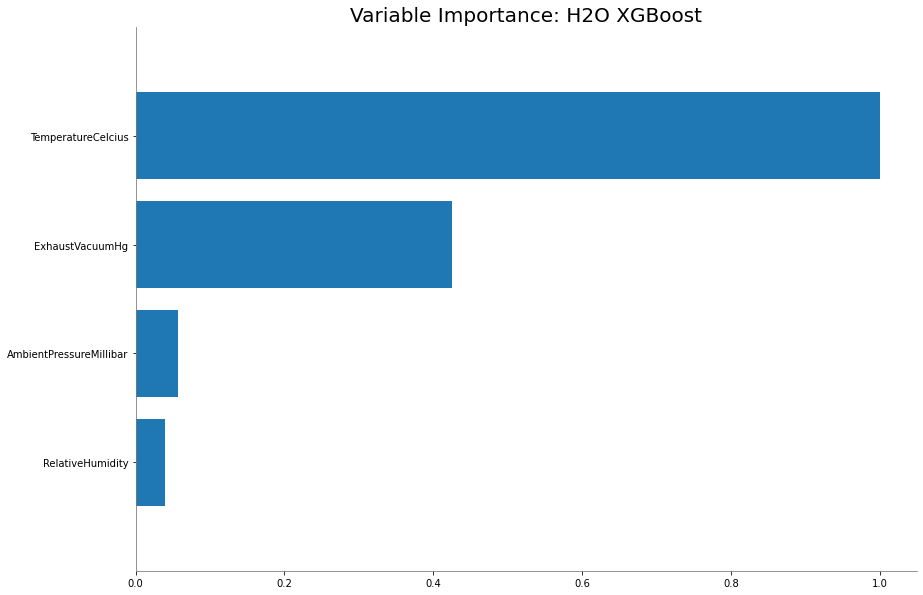

<Figure size 432x288 with 0 Axes>

In [24]:
out_xgb.varimp_plot()